# Imports 

In [1]:
import numpy as np
import pandas as pd
!pip3 install pandas_profiling --upgrade
import pandas_profiling

import itertools

from tqdm.notebook import tqdm as tqdm

from matplotlib import pyplot as plt
import matplotlib.cm as cm
import plotly.express as px
import plotly
print(f"plotly.__version__: {plotly.__version__}")



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 KB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.5/344.5 KB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 60.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 KB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 KB 26.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=85f7a4a672b91cc506c254fee6e3e3677c22968f7a275f76834a406960a4a472
  Stored in directory: /root/.cache/pip/wheels/23/14/6e/4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
Successfully built htmlmin
  Attempti

<ipython-input-1-18e97e8780ec>:4: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


plotly.__version__: 5.5.0


## sklearn

In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import NearestNeighbors, kneighbors_graph

from sklearn.cluster import KMeans, AffinityPropagation
from sklearn.cluster import DBSCAN, SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import calinski_harabasz_score, adjusted_rand_score,\
       adjusted_mutual_info_score, silhouette_score, silhouette_samples,\
       make_scorer, homogeneity_score, completeness_score, v_measure_score

from sklearn.pipeline import Pipeline

In [3]:
SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rcParams['figure.facecolor'] = 'white'

plt.style.use('seaborn-white')

In [4]:
!pip install clusteval
#!pip install hdbscan
# Import library
from clusteval import clusteval


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=878a92acafe68301b771d3d01b497a6c6513ee3e5c06894f0c9b929b1a76784b
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 60.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp38-cp38-linux_x86_64.whl size=3773986 sha256=19f297ab019e8bfcd721f2e6f8930fb8d1255515d661ccece79c8d4d8823bb76
  Stored in directory: /root/.cache/pip/wheels/76/06/48/527e038689c581cc9e519c73840efdc7473805149e55bd7ffd
S

# Dataset


## Read data

In [5]:
!pip install bds_courseware
from bds_courseware import read_drive_dataset
from bds_courseware import print_dataset_description, print_module_datasets
from bds_courseware import HOMEWORK_DATASETS
print('Dataset names:', HOMEWORK_DATASETS.keys())
name = 'quake';
df = read_drive_dataset(*HOMEWORK_DATASETS[name])
print(df.head(2))
print(df.shape)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Dataset names: dict_keys(['suicide_rates', 'car_perfs', 'brain', 'bank', 'air_quality', 'hypothyroid', 'movies', 'bike_sharing_day', 'bike_sharing_hour', 'quake'])
   Focal depth  Latitude  Longitude  Richter
0           33    -52.26      28.30      6.7
1           36     45.53     150.93      5.8
(2178, 4)


# EDA

In [6]:
df.head()

,Focal depth,Latitude,Longitude,Richter
0,33,-52.26,28.30,6.7
1,36,45.53,150.93,5.8
2,57,41.85,142.78,5.8
3,67,29.19,141.15,6.2
4,30,-21.66,169.81,6.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2178 entries, 0 to 2177
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Focal depth  2178 non-null   int64  
 1   Latitude     2178 non-null   float64
 2   Longitude    2178 non-null   float64
 3   Richter      2178 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 68.2 KB


We can see that there are no obvious data missing and data types are alright

## Variables

In [8]:
profile = pandas_profiling.ProfileReport(df)
profile.to_file('profile.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Everything looks alright on the first glance

## Duplicates

In [9]:
df.duplicated().sum()

1

In [10]:
df.drop_duplicates(inplace=True)

# Modelling

## Preprocessor pipeline

For the clustering algorithms that are working with a distance we need to scale the features

In [11]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
])

df_tr = pipeline.fit_transform(df)

print(df_tr[:10])

[[-0.35544588 -1.97176801 -0.22379731  3.81578947]
 [-0.32968527  1.23106248  0.80779516 -0.93557774]
 [-0.14936103  1.11053466  0.73923544 -0.93557774]
 [-0.06349234  0.69589273  0.72552349  1.17614102]
 [-0.38120648 -0.96955292  0.96661817  0.12028164]
 [-0.63881254  0.49610476  0.5524838   1.17614102]
 [ 0.5547622  -0.93811088  0.96754351  0.64821133]
 [-0.12360042  0.47121314  0.32535344  0.12028164]
 [-0.20946911 -0.70688087  0.93423106  0.12028164]
 [ 0.38302483 -0.79432904 -1.0646844   0.12028164]]


## Scorer

In [12]:
def silhouette_scorer(estimator, X):
    clusters = estimator.fit(X)
    score = silhouette_score(X, clusters.labels_, metric="sqeuclidean")
    return score

## PCA

In [ ]:
pca = PCA(n_components=2)

X_2d = pca.fit_transform(df_tr)

In [ ]:
df['pca_x'], df['pca_y'] = X_2d[:, 0], X_2d[:, 1]

In [ ]:
fig = px.scatter(df, x='pca_x', y='pca_y')
fig.update_layout(title='Quake in 2d PCA space')
fig.show()

I don't see clear clusters on this plot

## K-Means

### 15 clusters

I was asked to build a K-Means with 15 cclusters

In [ ]:
kmeans = KMeans(n_clusters=15, random_state=0)
y_kmeans = kmeans.fit_predict(df_tr)
df['kmeans_label'] = pd.Series(y_kmeans)

In [ ]:
fig = px.scatter(df, x='pca_x', y='pca_y', color='kmeans_label')
fig.update_layout(title='Quake in 2d PCA space (KMeans labels)')
fig.show()

Looks messy. Let's try to find the best number of clusters using silhouette coefficient:

### Inertia and scree plot

In [ ]:
Sum_of_squared_distances = []
K = range(5,25)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_tr)
    Sum_of_squared_distances.append(km.inertia_)

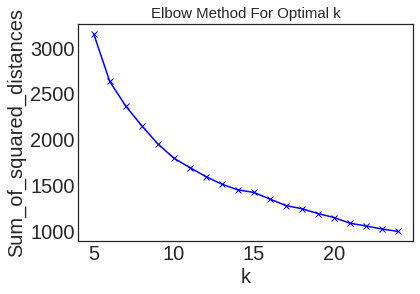

In [ ]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

It looks like that optimak number of clusters is between 11 and 18

### Silhouette coefficients

For n_clusters = 11 The average silhouette_score is : 0.3393636685142079
For n_clusters = 12 The average silhouette_score is : 0.3562578697374023
For n_clusters = 13 The average silhouette_score is : 0.32862998527552917
For n_clusters = 14 The average silhouette_score is : 0.33151963968799353
For n_clusters = 15 The average silhouette_score is : 0.31879996159435925
For n_clusters = 16 The average silhouette_score is : 0.302044345857736
For n_clusters = 17 The average silhouette_score is : 0.3451883894183935
For n_clusters = 18 The average silhouette_score is : 0.31198751131970354


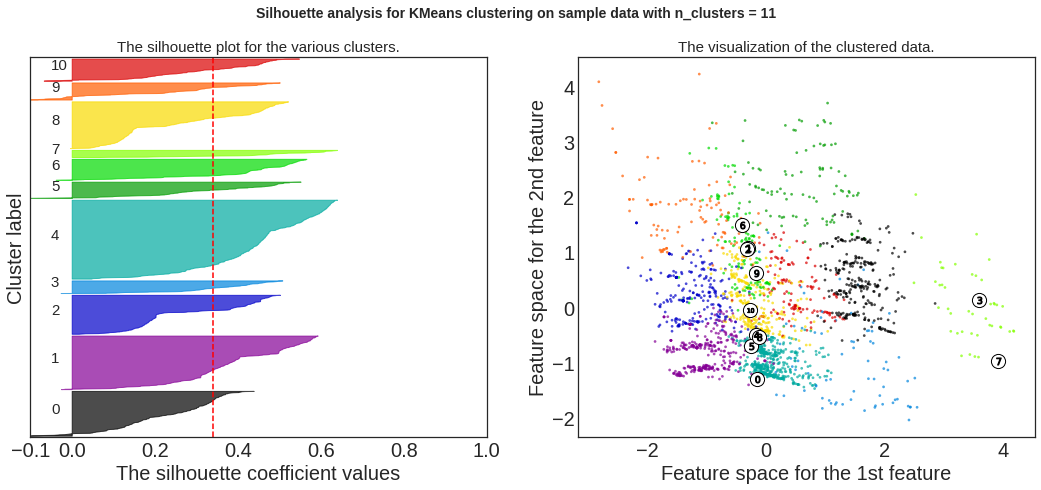

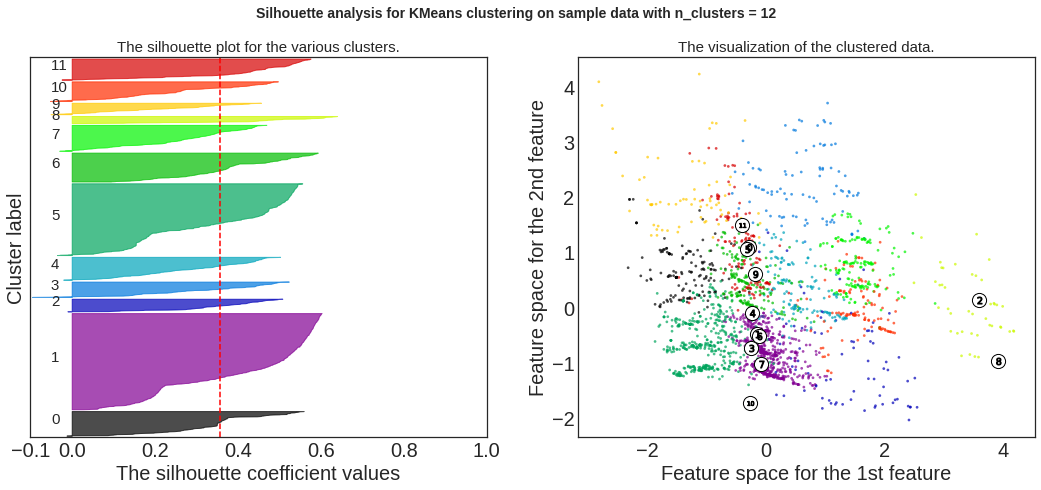

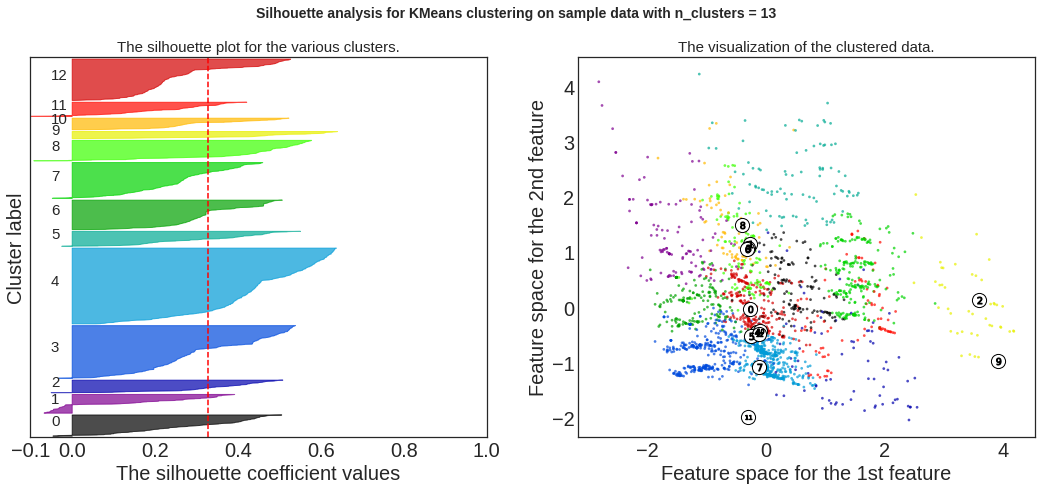

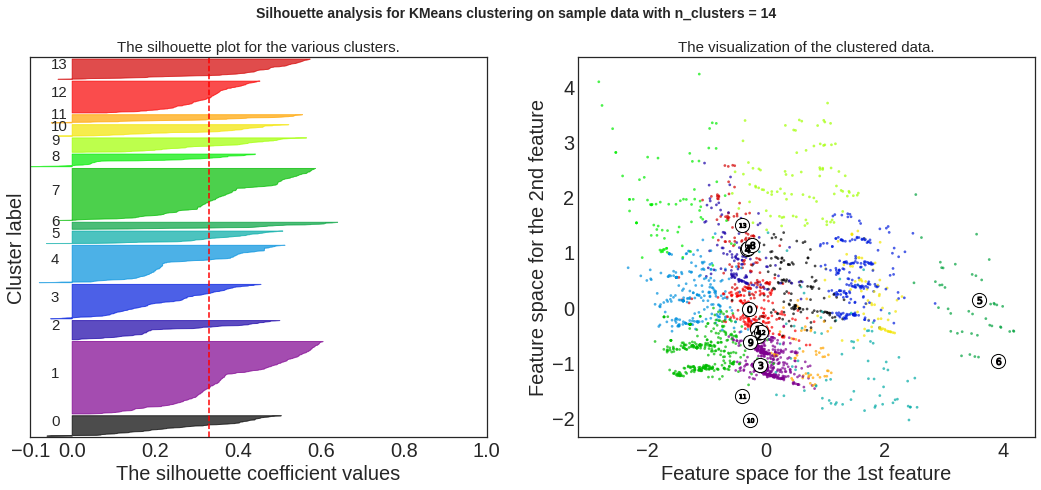

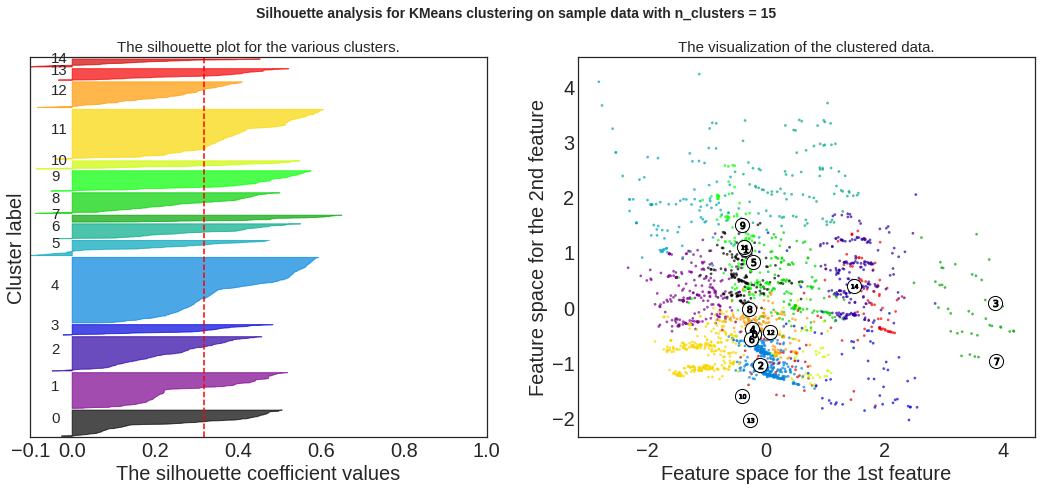

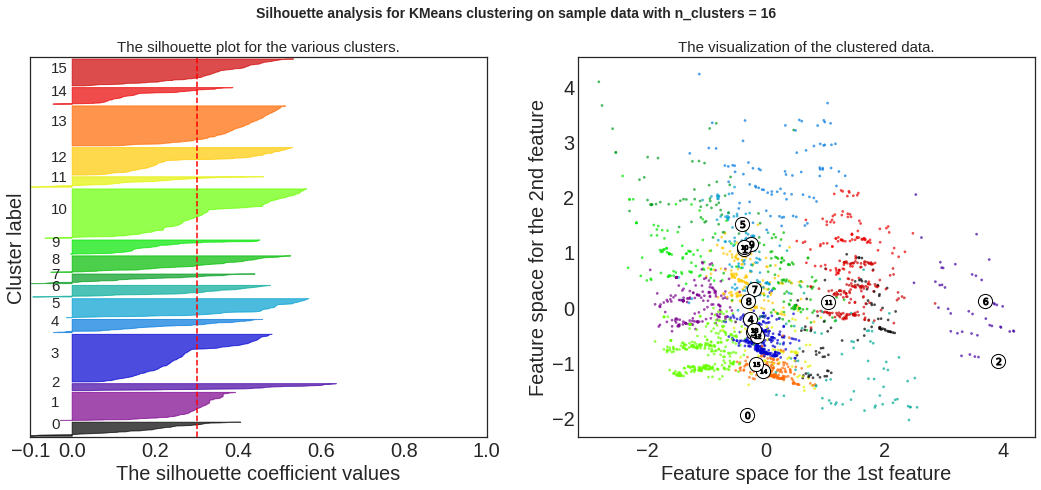

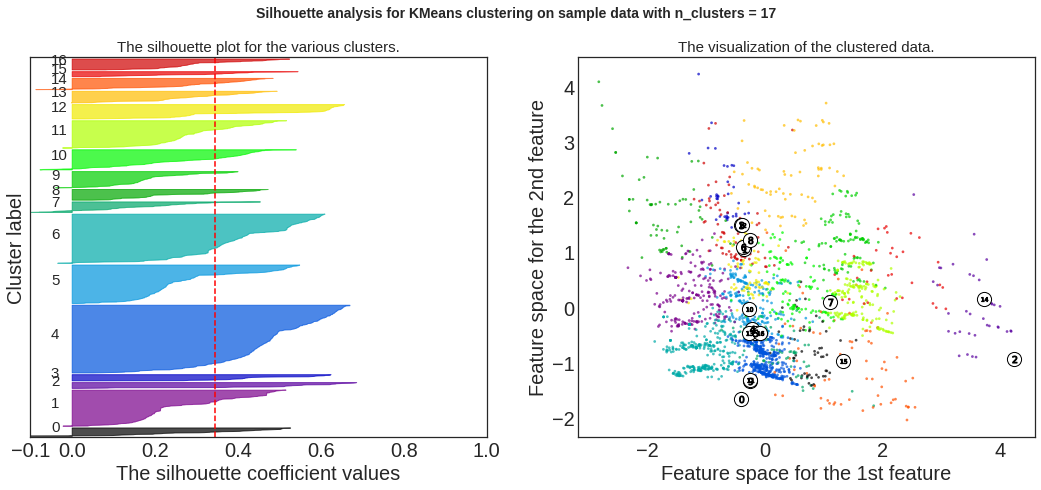

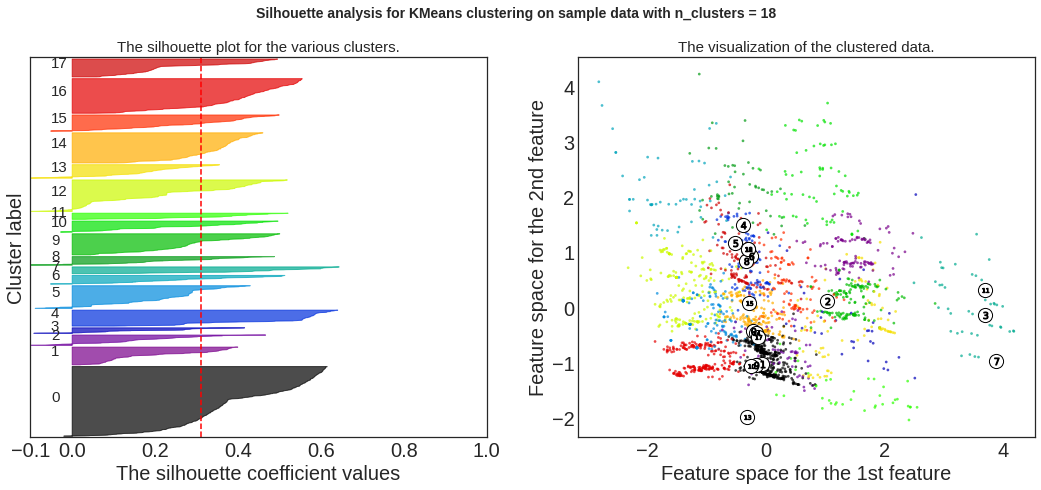

In [ ]:
range_n_clusters = np.arange(11,19)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_tr) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_tr)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_tr, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_tr, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        df['pca_x'], df['pca_y'], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

For n_clusters = 12 The average silhouette_score is : 0.3562578697374023 - this is the best score so far

### Clusteval


[clusteval] >Fit using kmeans with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using silhouette.


100%|██████████| 23/23 [00:33<00:00,  1.44s/it]


[clusteval] >Optimal number clusters detected: [8].
[clusteval] >Fin.


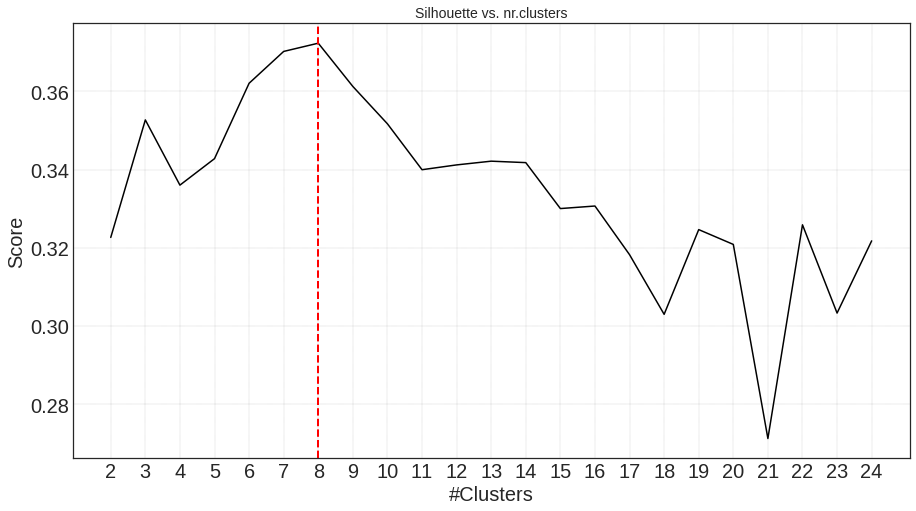

[clusteval] >Estimated number of n_clusters: 7, average silhouette_score=0.372


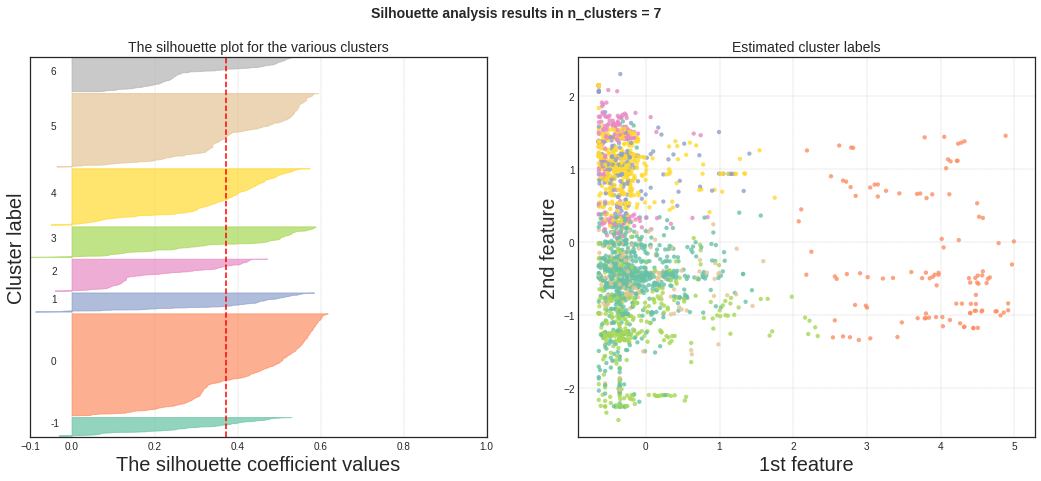

In [ ]:
# Set parameters, as an example dbscan
ce = clusteval(evaluate='silhouette', cluster='kmeans')

# Fit to find optimal number of clusters using dbscan
results= ce.fit(df_tr)

# Make plot of the cluster evaluation
ce.plot()

# Make scatter plot. Note that the first two coordinates are used for plotting.
ce.scatter(df_tr)

# results is a dict with various output statistics. One of them are the labels.
cluster_labels = results['labx']

Clusterval found that for n_clusters: 6, average silhouette_score=0.370 

## Affinity propagation

Dataset is fairly small so I can afford to try out Affinity Propagation algorythm. 

In [ ]:
%%time

af = AffinityPropagation()

grid = {
    'preference': [None, -100, -500],
    'damping': np.linspace(0.5, 1.0, 5),
}

gs = GridSearchCV(af, grid, cv=3, scoring=silhouette_scorer)
gs.fit(df_tr)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_affinity_propagation.py:250: ConvergenceWarning:

Affinity propagation did not converge, this model will not have any cluster centers.

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_affinity_propagation.py:250: ConvergenceWarning:

Affinity propagation did not converge, this model will not have any cluster centers.

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_affinity_propagation.py:250: ConvergenceWarning:

Affinity propagation did not converge, this model will not have any cluster centers.

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_affinity_propagation.py:250: ConvergenceWarning:

Affinity propagation did not converge, this model will not have any cluster centers.

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:770: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call l

CPU times: user 2min 43s, sys: 10.4 s, total: 2min 53s
Wall time: 2min 50s


GridSearchCV(cv=3, estimator=AffinityPropagation(),
             param_grid={'damping': array([0.5  , 0.625, 0.75 , 0.875, 1.   ]),
                         'preference': [None, -100, -500]},
             scoring=<function silhouette_scorer at 0x7ff0283e7700>)

In [ ]:
print("Silhouette Coefficient: %0.3f"%gs.best_score_)
print("Best estimator: %s"%gs.best_estimator_)
n_clusters_ = len(gs.best_estimator_.cluster_centers_indices_)
print("Estimated number of clusters: %d"%n_clusters_)

Silhouette Coefficient: 0.530
Best estimator: AffinityPropagation(damping=0.875, preference=-100)
Estimated number of clusters: 11


Result is better than K-Means. Let's compare similarity to K-Means clustering

In [ ]:
kmeans = KMeans(n_clusters=11, random_state=0)
y_kmeans = kmeans.fit_predict(df_tr)

af = AffinityPropagation(preference=-100, random_state=0, damping=0.875).fit(df_tr)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

print("Homogeneity: %0.3f" % homogeneity_score(y_kmeans, labels))
print("Completeness: %0.3f" % completeness_score(y_kmeans, labels))
print("V-measure: %0.3f" % v_measure_score(y_kmeans, labels))
print("Adjusted Rand Index: %0.3f" % adjusted_rand_score(y_kmeans, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % adjusted_mutual_info_score(y_kmeans, labels)
)

Homogeneity: 0.864
Completeness: 0.866
V-measure: 0.865
Adjusted Rand Index: 0.849
Adjusted Mutual Information: 0.863


We can see that there are some difference in cluster labels between two algorithms (scores are not close to 1)

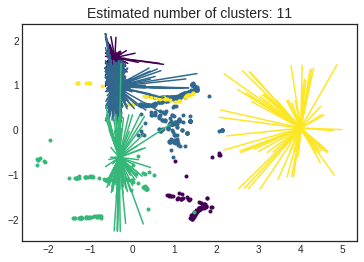

In [ ]:
colors = plt.cycler("color", plt.cm.viridis(np.linspace(0, 1, 4)))

for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = df_tr[cluster_centers_indices[k]]
    plt.scatter(
        df_tr[class_members, 1], df_tr[class_members, 2], color=col["color"], marker="."
    )
    plt.scatter(
        cluster_center[0], cluster_center[1], s=14, color=col["color"], marker="o"
    )
    for x in df_tr[class_members]:
        plt.plot(
            [cluster_center[0], x[0]], [cluster_center[1], x[1]], color=col["color"]
        )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()


## Spectral clustering

It is written in the documentation that spectral clustering works well only with small amount of clusters, so I will try it with 7-11 clusters

In [ ]:
spectral = SpectralClustering(eigen_solver="arpack", affinity="nearest_neighbors" )
grid = {
    'n_clusters': np.arange(7,12),
}

gs = GridSearchCV(spectral, grid, cv=3, scoring=silhouette_scorer)
gs.fit(df_tr)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



GridSearchCV(cv=3,
             estimator=SpectralClustering(affinity='nearest_neighbors',
                                          eigen_solver='arpack'),
             param_grid={'n_clusters': array([ 7,  8,  9, 10, 11])},
             scoring=<function silhouette_scorer at 0x7ff0283e7700>)

In [ ]:
print("Silhouette Coefficient: %0.3f"%gs.best_score_)
print("Best estimator: %s"%gs.best_estimator_)
print("Estimated number of clusters: %d"%gs.best_estimator_.n_clusters)

Silhouette Coefficient: 0.231
Best estimator: SpectralClustering(affinity='nearest_neighbors', eigen_solver='arpack',
                   n_clusters=9)
Estimated number of clusters: 9


Very poor result, most probably this type of data is not suitable for spectral clustering

## Agglomerative clustering


[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using silhouette.


100%|██████████| 23/23 [00:08<00:00,  2.72it/s]


[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [14].
[clusteval] >Fin.


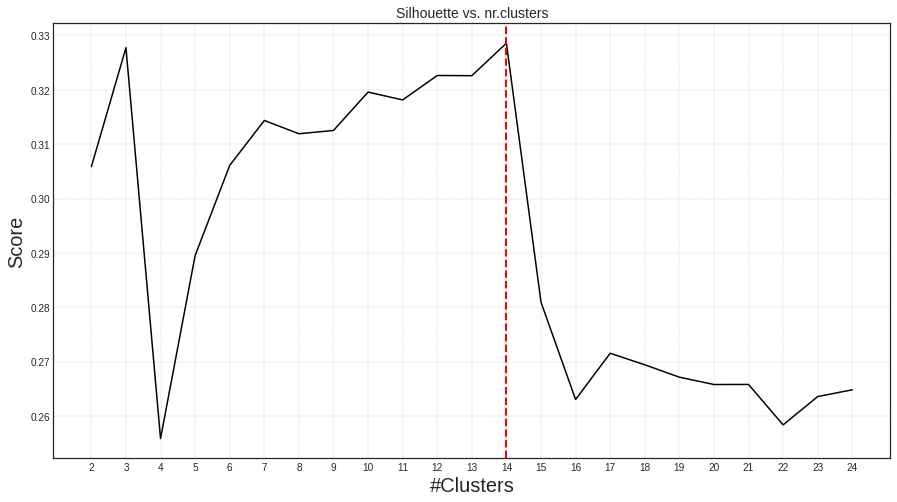

[clusteval] >Estimated number of n_clusters: 14, average silhouette_score=0.329


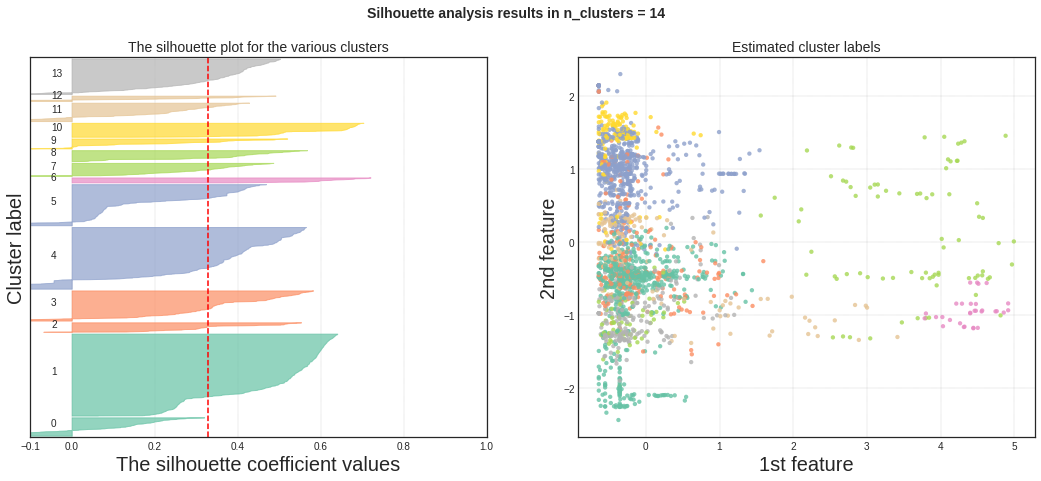

In [ ]:
# Set parameters, as an example dbscan
ce = clusteval(evaluate='silhouette', cluster='agglomerative')

# Fit to find optimal number of clusters using dbscan
results= ce.fit(df_tr)

# Make plot of the cluster evaluation
ce.plot()

# Make scatter plot. Note that the first two coordinates are used for plotting.
ce.scatter(df_tr)

# results is a dict with various output statistics. One of them are the labels.
cluster_labels = results['labx']

Result is better than Spectral, but worse than K-Means and Affinity Propagation. Let's see the dendrogram anyway

[clusteval] >Plotting the dendrogram with optimized settings: metric=euclidean, linkage=ward, max_d=12.395. Be patient now..
[clusteval] >Compute cluster labels.


{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [12.5, 12.5, 42.5, 42.5],
  [65.0, 65.0, 75.0, 75.0],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [70.0, 70.0, 92.5, 92.5],
  [115.0, 115.0, 125.0, 125.0],
  [135.0, 135.0, 145.0, 145.0],
  [155.0, 155.0, 165.0, 165.0],
  [140.0, 140.0, 160.0, 160.0],
  [120.0, 120.0, 150.0, 150.0],
  [81.25, 81.25, 135.0, 135.0],
  [27.5, 27.5, 108.125, 108.125],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [175.0, 175.0, 192.5, 192.5],
  [215.0, 215.0, 225.0, 225.0],
  [235.0, 235.0, 245.0, 245.0],
  [220.0, 220.0, 240.0, 240.0],
  [275.0, 275.0, 285.0, 285.0],
  [265.0, 265.0, 280.0, 280.0],
  [255.0, 255.0, 272.5, 272.5],
  [230.0, 230.0, 263.75, 263.75],
  [183.75, 183.75, 246.875, 246.875],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [325.0, 325.0, 335.0, 335.0],
  [355.0, 355.0, 365.0, 365.0],
  [345.0, 345.0, 360.0

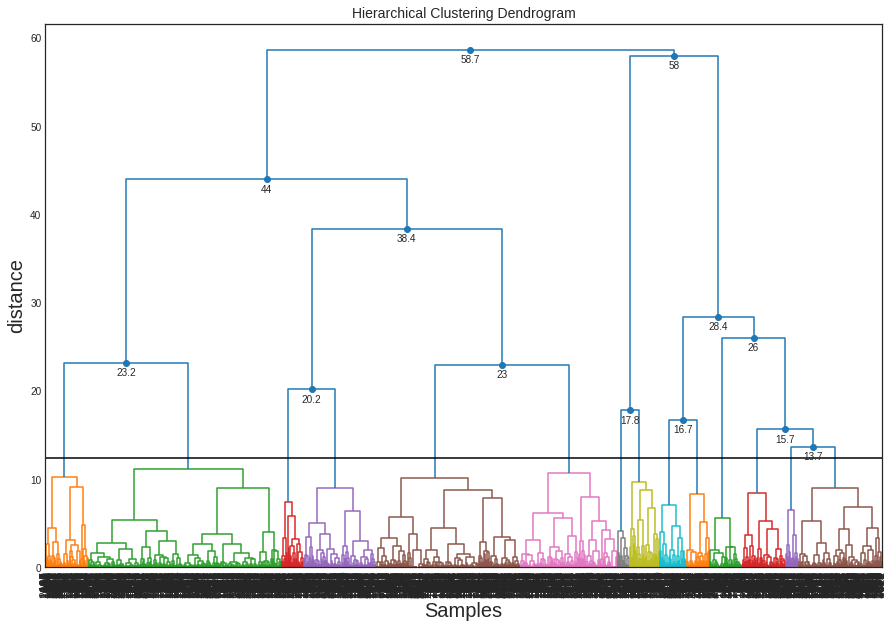

In [ ]:
ce.dendrogram()

Let's see the similarity with KMeans

In [ ]:
kmeans = KMeans(n_clusters=14, random_state=0)
y_kmeans = kmeans.fit_predict(df_tr)

# connectivity matrix for structured Ward
connectivity = kneighbors_graph(
  df_tr, n_neighbors=10, include_self=False
)

al = AgglomerativeClustering(
        linkage="ward",
        n_clusters=14,
        connectivity=connectivity,
    ).fit(df_tr)
labels = al.labels_

print("Homogeneity: %0.3f" % homogeneity_score(y_kmeans, labels))
print("Completeness: %0.3f" % completeness_score(y_kmeans, labels))
print("V-measure: %0.3f" % v_measure_score(y_kmeans, labels))
print("Adjusted Rand Index: %0.3f" % adjusted_rand_score(y_kmeans, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % adjusted_mutual_info_score(y_kmeans, labels)
)

print(silhouette_score(df_tr, labels))

Homogeneity: 0.755
Completeness: 0.788
V-measure: 0.771
Adjusted Rand Index: 0.715
Adjusted Mutual Information: 0.767
0.31816311411428777


We can see that hierarchicl clustering gives very different result from KMeans

## DBScan


[clusteval] >Fit using hdbscan with metric: euclidean, and linkage: ward
[clusteval] >Estimated number of clusters: 290
[clusteval] >Silhouette Coefficient: 0.116
[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [291].
[clusteval] >Fin.
[clusteval] >Estimated number of n_clusters: 290, average silhouette_score=0.116


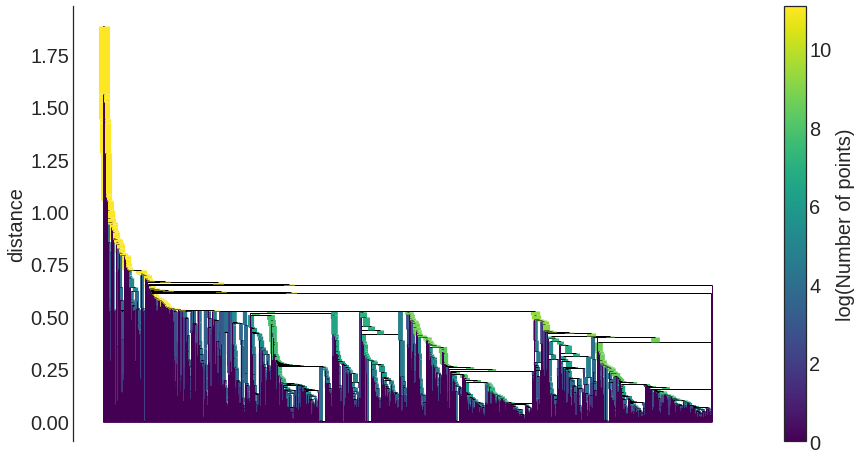

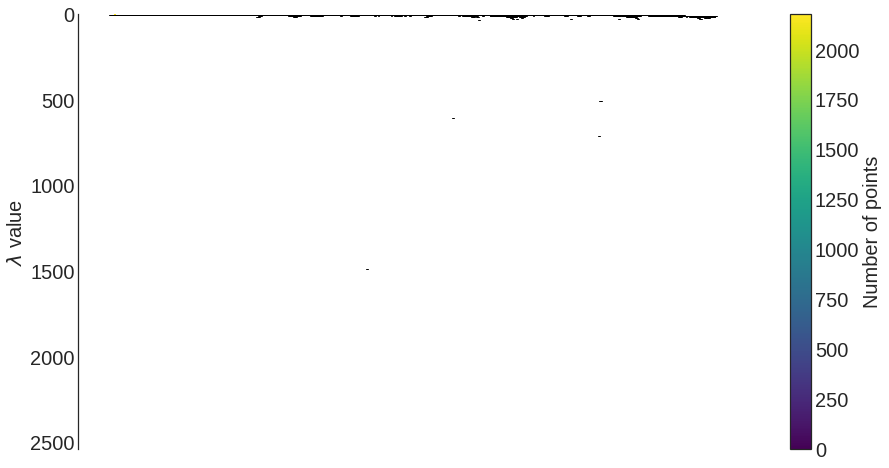

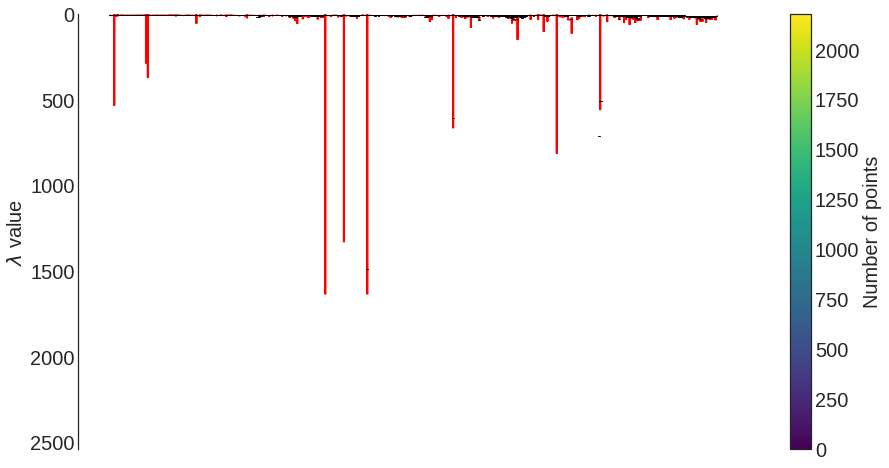

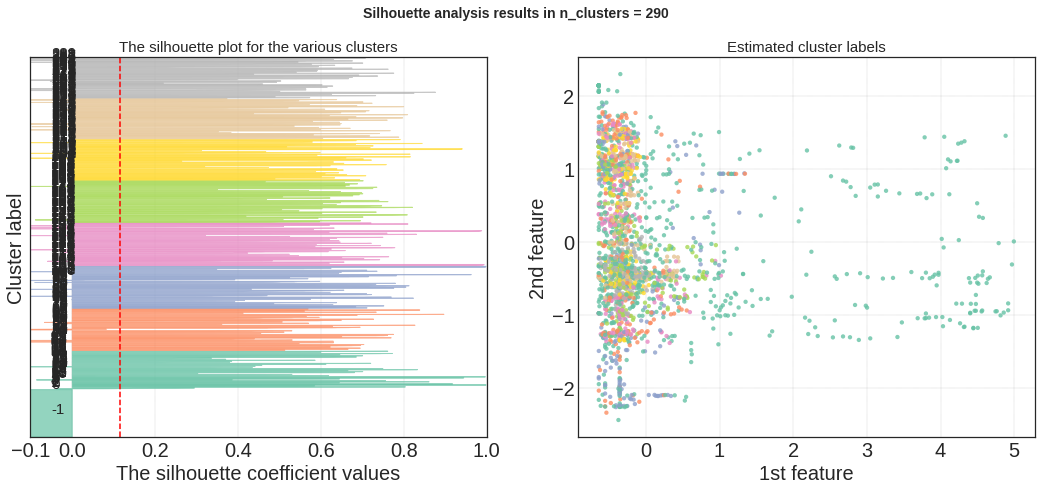

In [13]:
# Set parameters, as an example dbscan
ce = clusteval(evaluate='silhouette', cluster='hdbscan')

# Fit to find optimal number of clusters using dbscan
results= ce.fit(df_tr)

# Make plot of the cluster evaluation
ce.plot()

# Make scatter plot. Note that the first two coordinates are used for plotting.
ce.scatter(df_tr)

# results is a dict with various output statistics. One of them are the labels.
cluster_labels = results['labx']

# Conclusion

As for now (small number of features) only NB classifier is worse than others regarding roc-auc, SVM classifier took to long time to fit, which makes it useless for this particular task

I couldn't do proper HP tuning because even RandomizedSearch took too long time. The best choice for now seems LR or SGDClassifier with log loss